In [ ]:
!pip install -q tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 60kB/s 
     |████████████████████████████████| 3.1MB 38.6MB/s 
     |████████████████████████████████| 501kB 47.8MB/s 


In [68]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_score,
    roc_auc_score,
)
import numpy as np

import seaborn as sns

import pandas as pd

In [ ]:
tf.__version__

'2.0.0-beta1'

In [ ]:
%load_ext tensorboard

In [ ]:
logdir='log'

In [31]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1465 - accuracy: 0.9545 - val_loss: 0.0422 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0399 - val_accuracy: 0.9875
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0260 - val_accuracy: 0.9917


In [36]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)


313/313 [==============================] - 1s 3ms/step


In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

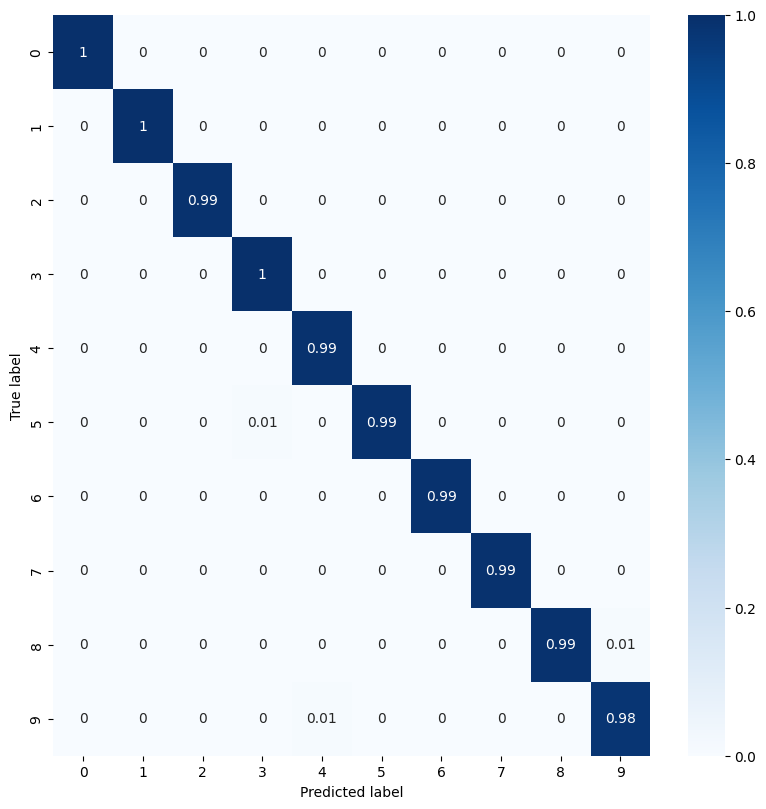

In [49]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [69]:
def calcular_metricas_basicas(y_true, y_pred):
  # Calculando a matriz de confusão
    con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

    # Calculando as métricas
    VP = np.diag(con_mat)  # Verdadeiros positivos
    FP = con_mat.sum(axis=0) - VP  # Falsos positivos
    FN = con_mat.sum(axis=1) - VP  # Falsos negativos
    VN = con_mat.sum() - (FP + FN + VP)  # Verdadeiros negativos

    # Cálculo de especificidade e precisão (macro média)
    especificidade = np.mean(VN / (VN + FP))
    precisao = np.mean(VP / (VP + FP))

  metricas= {
      "acurácia": accuracy_score(y_true, y_pred),
      "sensibilidade": recall_score(y_true, y_pred, average='macro'),
      "f1-score": f1_score(y_true, y_pred, average='macro'),
      "especificidade": especificidade,
      "precisão": precisao

    }
  return metricas


In [70]:
print("1. Métricas Básicas:")
print(calcular_metricas_basicas(y_true, y_pred))


1. Métricas Básicas:
{'acurácia': 0.9917, 'sensibilidade': 0.9916240250740127, 'f1-score': 0.991669806266479}


In [78]:
y_true = test_labels
y_pred_proba = model.predict(test_images)
n_classes = len(classes)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

313/313 [==============================] - 1s 3ms/step


In [77]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

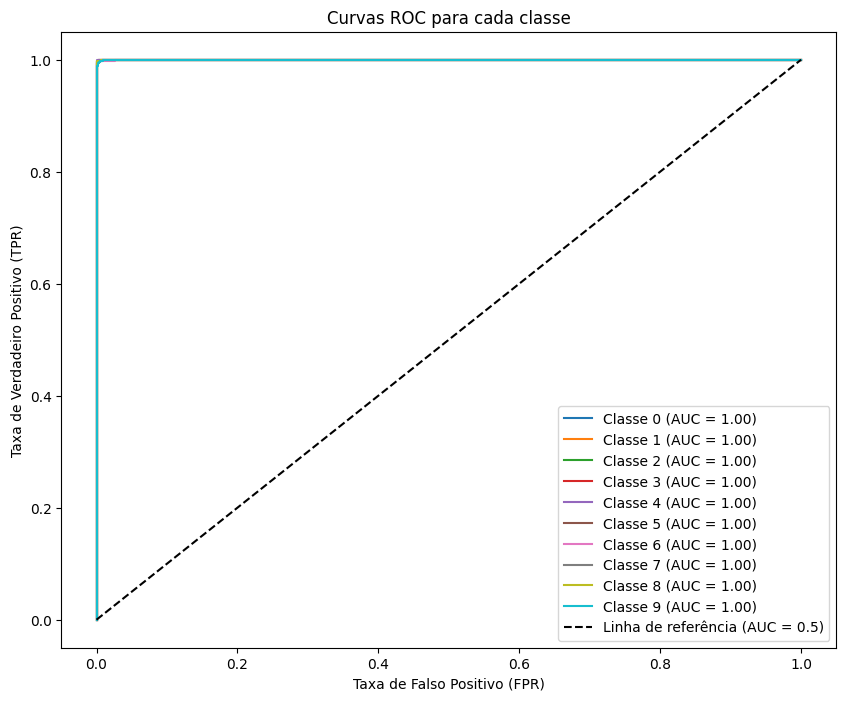

In [79]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Linha de referência (AUC = 0.5)')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curvas ROC para cada classe')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

In [ ]:
# Start TensorBoard.
%tensorboard --logdir logs/images